# COGS 108 - Final Project 

# Overview

This project seeks to find a correlation between park walkability and visitor satisfaction. I used data from Yelp to compare the average score of each park to several specific reviews that mention walking. Then, I briefly examined the trend of Yelp reviews themselves. I could find no correlation between park walkability and visitor satisfaction, but further research should be performed to reach a concrete conclusion.

# Name & GitHub

- Name: Matt Wong
- GitHub Username: mdwong21

# Research Question

Does the walkability of parks in San Diego significantly contribute to visitor satisfaction?

## Background and Prior Work

People choose to utilize parks for a variety of reasons, and many parks offer a wide variety of attractions. Nearly every park, naturally, includes some accomodations for walking. Visiting a park has been shown to have positive affects on the human body, physically and mentally (1), so understanding how a park can better cater to these needs may improve its affect on the community. Visitor use is something that is often tracked by the National Park Service (2), lending weight to its importance, but for the scope of this project, I will be focusing on the areas local to San Diego.

References (include links):
- 1) https://cnr.ncsu.edu/news/2015/11/why-a-trip-to-the-park-is-good-for-your-health/
- 2) https://www.nps.gov/subjects/socialscience/visitor-use.htm

# Hypothesis


I believe that walkability will have a positive impact on visitor satisfaction on an individual level (to those who went looking for a walk), but will likely not show a significant change in average satisfaction among all visitors.

# Dataset(s)

- Dataset Name: Yelp Data for San Deigo Parks, Park Information
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_parks.csv
- Number of observations: 833
- Description: This is a collection of different San Diego parks and their information from Yelp, including location, phone number, and average Yelp review score.



- Dataset Name: Yelp Data for San Deigo Parks, Reviews
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_reviews.csv
- Number of observations: 2333
- Description: This is a collection of curated Yelp reviews relating to the above parks, including a rating and part of the review text.

I intend to isolate reviews that specifically mention walking to see how their score relates to the overall average Yelp review score for each park.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
df_parks = pd.read_csv('https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_parks.csv')
df_reviews = pd.read_csv('https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_reviews.csv')

In [3]:
df_parks.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [4]:
# drop columns that aren't relevant to the question
df_parks = df_parks.drop(columns = ['address', 'phone', 'id', 'url', 'longitude', 'latitude', 'is_closed'])

# some parks are repeated with different ratings, combine them and average the rating
df_parks = df_parks.groupby('name').agg({'rating': 'mean', 'review_count': 'first'})

# rename columns in df_reviews for better identification when compared to df_parks
df_reviews = df_reviews.rename(columns={'id': 'name', 'rating': 'indiv_score'})

In [5]:
# merge the data to a single dataframe
df = pd.merge(df_parks, df_reviews, on='name')

In [6]:
# this isolates the reviews that specifically mention walking
def find_walk(string):
    if 'walk' in string:
        return 'walk'
    else:
        return np.nan

In [7]:
# apply find_walk and drop unrelated entries
df['text'] = df['text'].apply(find_walk)
df = df.dropna(subset=['text'])

# I also chose to drop entries with low review counts. I chose 5 because the rating is a 5-point scale
df = df[df['review_count'] >= 5]
df

,name,rating,review_count,indiv_score,text
4,4S Patriot Park,4.5,16,5,walk
5,4S Patriot Park,4.5,16,5,walk
6,4S Patriot Park,4.5,16,3,walk
19,A National Salute to Bob Hope & the Military,4.5,43,4,walk
65,Allied Gardens Recreational Center,3.0,5,4,walk
...,...,...,...,...,...
2283,Water Conservation Garden,4.5,47,5,walk
2284,Waterfront Park,4.5,242,5,walk
2294,Western Hills Park,3.5,22,4,walk
2311,Windansea Beach,4.5,189,3,walk


# Data Analysis & Results

First, I checked the amount of ratings each park was receiving, then checked the amount of individual scores at each value.

In [8]:
# I added an extra column to make graphs look nicer
df_sorted = df.sort_values(by=['rating'])
df_sorted['ordered_parks'] = np.arange(0,len(df.index))
df_sorted

,name,rating,review_count,indiv_score,text,ordered_parks
817,Horton Plaza- Westfield Parking,1.5,275,1,walk,0
1053,Loma Village,2.5,23,1,walk,1
76,Angelo Italy Formal Wear,2.5,31,1,walk,2
813,Horton Plaza Park,3.0,47,5,walk,3
766,Harry Griffen Park,3.0,26,5,walk,4
...,...,...,...,...,...,...
1889,Solana Ranch Park,5.0,6,5,walk,159
1287,Mushroom House,5.0,8,5,walk,160
1822,Self Realization Fellowship Hermitage & Medita...,5.0,345,5,walk,161
312,Cat Jetty,5.0,12,5,walk,162


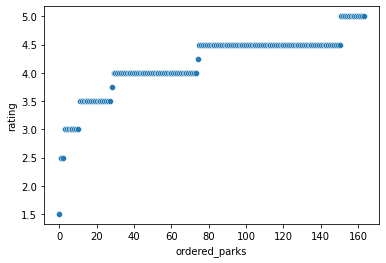

In [9]:
sns.scatterplot(x=df_sorted['ordered_parks'], y=df_sorted['rating'])

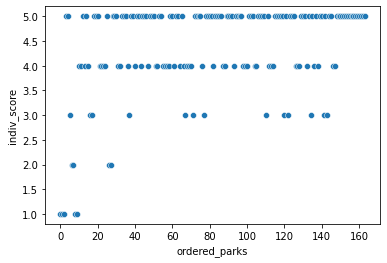

In [10]:
sns.scatterplot(x=df_sorted['ordered_parks'], y=df_sorted['indiv_score'])

At first glance, it would appear that people who mentioned walking tend to rate higher than the average review, however this is not enough to formulate a conclusion. I should also check how individual scores compare to the average review in general.

C:\Users\Matt\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


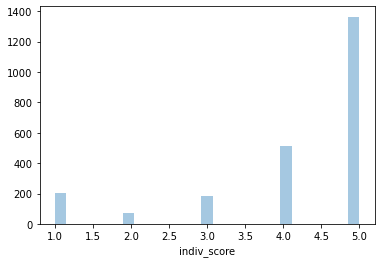

In [11]:
sns.distplot(a=df_reviews['indiv_score'], kde = False)

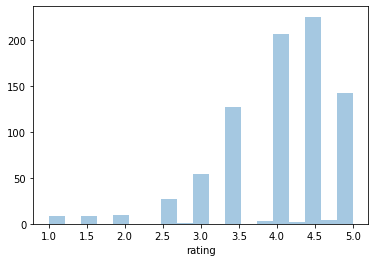

In [12]:
sns.distplot(a=df_parks['rating'], kde = False)

So it seems that individual reviews have a high tendancy to rate a score of 5, or, at the very least, the individual reviews chosen for this dataset (i.e. reviews that have usable writing in them) tend to give a score of 5.

# Ethics & Privacy

All names and any identifying personal information from the Yelp reviewers whose text I used was removed, and all text other than the word "walk" that I searched for was removed, though it probably should have been removed prior to using the data in this analysis so that absolutely no personal information would be present.

Furthermore, using walks in the park as an evaluation here denies consideration for disabled people. If this analysis is to be taken as a suggestion to keep walkability in mind, it should also come with proper accomodations for accessibility, as parks especially should be a place for anyone to use.

As a last note, I should acknowledge that the method I used to analyize this topic is somewhat simple and would fail to catch a few important cases. Firstly, I noticed that some reviews were for locations unrelated to parks and recreation, but would still be caught when searching for mentions of the word "walk" due to the variety of ways the word can be used ("walk-in" for example). These same cases would show up for recreational centers that were included, which fall outside the subset I was trying to analyze (parks). Additionally, my usage of a single word to signal for a person's intentions or feelings is not very concrete evidence, meaning I probably should have used a dataset more suited to the question I was trying to answer.

# Conclusion & Discussion

While there appears to be a potential increase in satisfaction based on park walkability, I cannot confirm that this actually is the case with the data I used. In addition to the confounds listed above, the scale of the Yelp review does not allow me to truly see how walkability improved the experience of the visitor, as the scale ends at 5 and a large amount of the reviews had that maximum score.

It also seems that the type of review that can give the data I was trying to use may just come from people who had an enjoyable experience. It could be that someone who is less verbose or less coherent may be less likely to give a perfect score, and my data does not include those people.

If there is one conclusion I would like to make from this attempt, it would be that Yelp reviews are possibly not a very good indicator of success. There are several external things that can influence the score of a Yelp review, and a possible further study would be those relationships. However, if I wanted to return to this question, it likely should be with a different dataset.